In [2]:
import torchaudio

In [13]:

wav_path = "/import/c4dm-datasets/FSD50K/dev_audio/16399.wav"
labels = "/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
waveform, sr = torchaudio.load(wav_path)


In [14]:
fbank = torchaudio.compliance.kaldi.fbank(waveform,htk_compat=True,sample_frequency=sr,use_energy=False,window_type='hanning',num_mel_bins=128,dither=0.0,frame_shift=10)

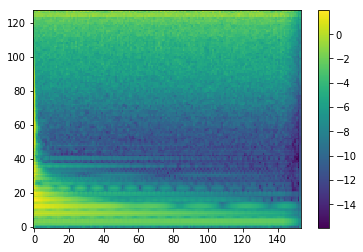

In [15]:
#display fbank
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(fbank.t().numpy(), aspect='auto', origin='lower')
plt.colorbar()
plt.show() 

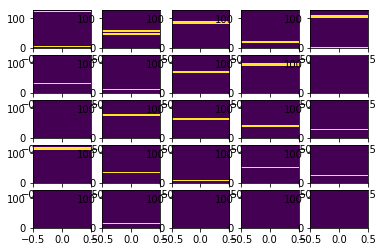

In [39]:
# K means on fbank and display
from sklearn.cluster import KMeans
import numpy as np
fbank_np = fbank.t().numpy()
kmeans = KMeans(n_clusters=25, random_state=0).fit(fbank_np)


# Show each cluster as a seperate mask 
plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(kmeans.labels_.reshape(-1,1) == i, aspect='auto', origin='lower')

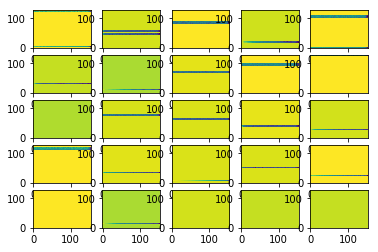

In [17]:
# apply the masks to the fbank  and display
plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(fbank.t().numpy() * (kmeans.labels_.reshape(-1,1) == i), aspect='auto', origin='lower')
    


In [18]:
# Now apply soft-kmeans and display the masks on each specrogram using librosa.display.specshow
import librosa.display
import skfuzzy as fuzz
import numpy as np
fbank_np = fbank.t().numpy()
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(fbank_np.T, 25, 2, error=0.005, maxiter=1000, init=None)
plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    librosa.display.specshow(fbank.t().numpy() * (u[i] > 0.5), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(f'Cluster {i}')
    plt.tight_layout()
    plt.show()


/homes/ss380/deeplearn/lib/python3.6/site-packages/paramiko/transport.py:32: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography will remove support for Python 3.6.
  from cryptography.hazmat.backends import default_backend


ModuleNotFoundError: No module named 'skfuzzy'

In [19]:
!pip install skfuzzy

ERROR: Could not find a version that satisfies the requirement skfuzzy (from versions: none)
ERROR: No matching distribution found for skfuzzy


In [20]:
! pip install skfuzy

ERROR: Could not find a version that satisfies the requirement skfuzy (from versions: none)
ERROR: No matching distribution found for skfuzy


In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
import numpy as np
fbank_np = fbank.t().numpy()
sc = SpectralClustering(n_clusters=25, affinity='nearest_neighbors', n_neighbors=10)
sc.fit(fbank_np)
plt.figure()
for i in range(1):
    #plt.subplot(5,1,i+1)
    # show the cluster centers

    plt.imshow(sc.cluster_centers_.reshape(-1,1) == 5, aspect='auto', origin='lower')
    #plt.imshow(sc.labels_.reshape(-1,1) == 5, aspect='auto', origin='lower')
    #plt.colorbar()
    plt.title(f'Cluster {i}')
    plt.tight_layout()
plt.show()


AttributeError: 'SpectralClustering' object has no attribute 'cluster_centers_'

<Figure size 432x288 with 0 Axes>